EDA Task on google play store dataset 


1. Handling missing data
2. Categorization and classification
3. logistic regression analysis

In [1]:
import pandas as pd

df = pd.read_csv(r'C:\Users\divaa\OneDrive\Desktop\pri\Bliend\Bliend dataset\googleplaystore.csv')


print(df.info())

print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB
None
            Rating
count  9367.000000
mean      4.193338
std       0.537431
min       1.000000
25%       4.000000
50%       4.300000
75%       4.500000
max   

In [2]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [3]:
# Clean the 'Reviews' column by removing non-numeric characters like 'M'
# and convert it to a numeric type after handling the multipliers
def clean_reviews(value):
    if 'M' in value:
        return float(value.replace('M', '')) * 1000000
    elif 'K' in value:
        return float(value.replace('K', '')) * 1000
    else:
        return float(value)


df['Reviews'] = df['Reviews'].apply(clean_reviews)


df['Reviews'] = df['Reviews'].astype(int)

print(df['Reviews'].head())



0       159
1       967
2     87510
3    215644
4       967
Name: Reviews, dtype: int32


In [4]:
import numpy as np

# Convert 'Installs' to string type before applying string operations
df['Installs'] = df['Installs'].astype(str)

# Clean 'Installs' by removing '+' and ',' and replace 'Free' with NaN
df['Installs'] = df['Installs'].str.replace('[+,]', '', regex=True)  # Remove '+' and ','
df['Installs'] = df['Installs'].replace('Free', np.nan)  # Replace 'Free' with NaN

# Convert the cleaned 'Installs' column to numeric (after removing any NaN values)
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')

print(df['Installs'].head())



0       10000.0
1      500000.0
2     5000000.0
3    50000000.0
4      100000.0
Name: Installs, dtype: float64


In [5]:
# Count the number of NaN values in the 'Installs' column
nan_count = df['Installs'].isna().sum()

print(f"Number of NaN values in 'Installs' column: {nan_count}")


Number of NaN values in 'Installs' column: 1


In [6]:

print(df['Size'].unique())


['19M' '14M' '8.7M' '25M' '2.8M' '5.6M' '29M' '33M' '3.1M' '28M' '12M'
 '20M' '21M' '37M' '2.7M' '5.5M' '17M' '39M' '31M' '4.2M' '7.0M' '23M'
 '6.0M' '6.1M' '4.6M' '9.2M' '5.2M' '11M' '24M' 'Varies with device'
 '9.4M' '15M' '10M' '1.2M' '26M' '8.0M' '7.9M' '56M' '57M' '35M' '54M'
 '201k' '3.6M' '5.7M' '8.6M' '2.4M' '27M' '2.5M' '16M' '3.4M' '8.9M'
 '3.9M' '2.9M' '38M' '32M' '5.4M' '18M' '1.1M' '2.2M' '4.5M' '9.8M' '52M'
 '9.0M' '6.7M' '30M' '2.6M' '7.1M' '3.7M' '22M' '7.4M' '6.4M' '3.2M'
 '8.2M' '9.9M' '4.9M' '9.5M' '5.0M' '5.9M' '13M' '73M' '6.8M' '3.5M'
 '4.0M' '2.3M' '7.2M' '2.1M' '42M' '7.3M' '9.1M' '55M' '23k' '6.5M' '1.5M'
 '7.5M' '51M' '41M' '48M' '8.5M' '46M' '8.3M' '4.3M' '4.7M' '3.3M' '40M'
 '7.8M' '8.8M' '6.6M' '5.1M' '61M' '66M' '79k' '8.4M' '118k' '44M' '695k'
 '1.6M' '6.2M' '18k' '53M' '1.4M' '3.0M' '5.8M' '3.8M' '9.6M' '45M' '63M'
 '49M' '77M' '4.4M' '4.8M' '70M' '6.9M' '9.3M' '10.0M' '8.1M' '36M' '84M'
 '97M' '2.0M' '1.9M' '1.8M' '5.3M' '47M' '556k' '526k' '76M' '7.6M'

In [7]:
import numpy as np


def convert_size(size):
    if isinstance(size, str):  # Check if the size is a string
        size = size.strip()  # Remove leading/trailing spaces
        
        # Handle 'Varies with device' or similar non-numeric values
        if size.lower() == 'varies with device' or size == 'N/A':
            return np.nan  # Return NaN for invalid values
        
        # If the size is in MB
        if 'M' in size:
            return float(size.replace('M', '').strip())  # Convert MB (remove 'M' and convert to float)
        
        # If the size is in KB
        elif 'K' in size:
            return float(size.replace('K', '').strip()) / 1024  # Convert KB to MB
        
        # If it's a number without units (e.g., '4.0')
        try:
            return float(size)  # Convert directly to float if no unit is specified
        except ValueError:
            return np.nan  # Return NaN if it can't be converted to float
        
    return np.nan  # Return NaN for any non-string values

df['Size'] = df['Size'].apply(lambda x: convert_size(x))

print(df['Size'].head())


0    19.0
1    14.0
2     8.7
3    25.0
4     2.8
Name: Size, dtype: float64


In [8]:

null_size_count = df['Size'].isnull().sum()


print(f"Number of 'size that will be varies with respect to device' in 'Size' column: {null_size_count}")


Number of 'size that will be varies with respect to device' in 'Size' column: 2012


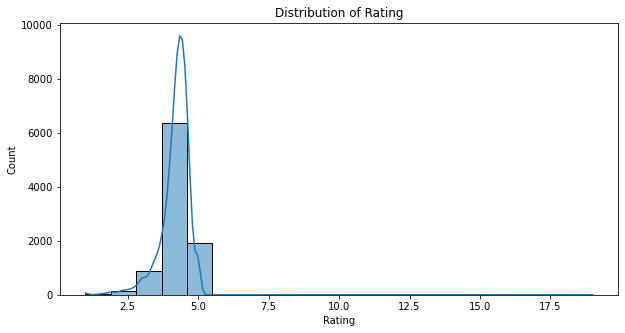

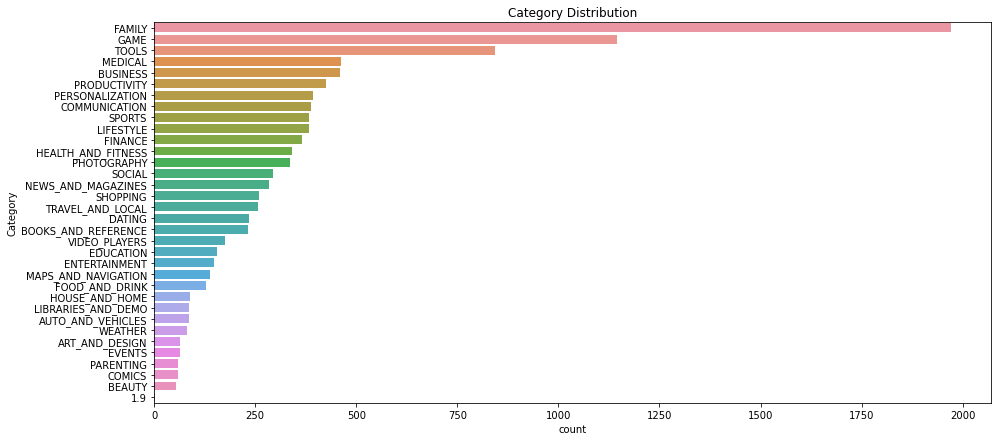

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for 'Rating'
plt.figure(figsize=(10, 5))
sns.histplot(df['Rating'].dropna(), bins=20, kde=True)
plt.title('Distribution of Rating')
plt.show()

# Count plot for 'Category'
plt.figure(figsize=(15, 7))
sns.countplot(y='Category', data=df, order=df['Category'].value_counts().index)
plt.title('Category Distribution')
plt.show()


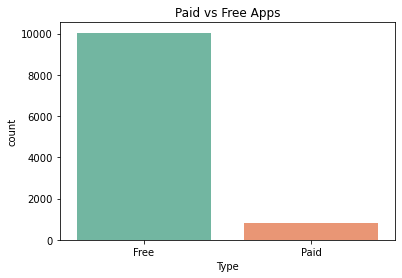

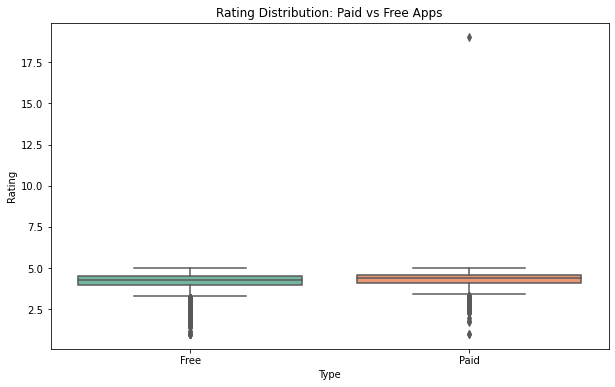

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot distribution of Paid vs Free apps
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Type', palette='Set2')
plt.title('Paid vs Free Apps')
plt.show()
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Type', y='Rating', palette='Set2')
plt.title('Rating Distribution: Paid vs Free Apps')
plt.show()


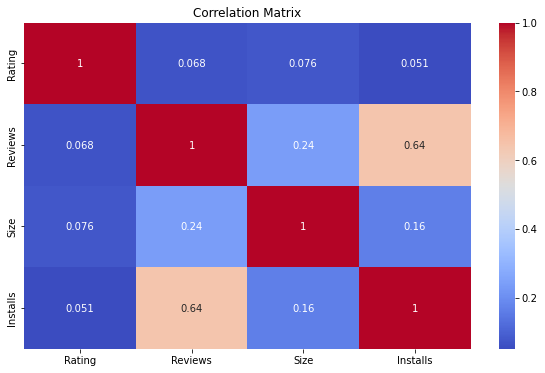

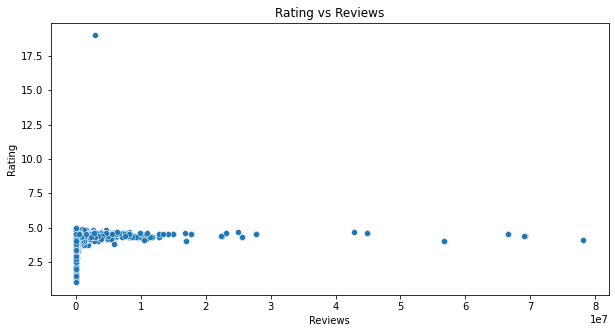

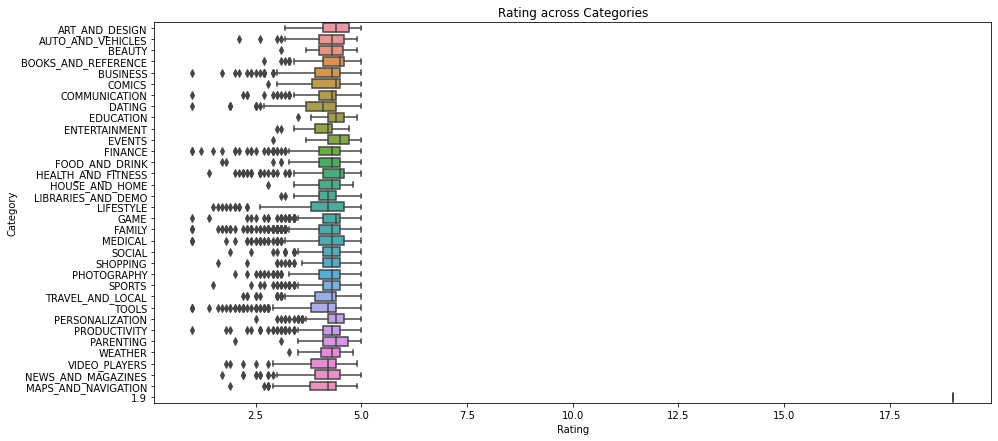

In [10]:
# Correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Scatter plot of Rating vs Reviews
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Reviews', y='Rating', data=df)
plt.title('Rating vs Reviews')
plt.show()

# Box plot of Rating by Category
plt.figure(figsize=(15, 7))
sns.boxplot(x='Rating', y='Category', data=df)
plt.title('Rating across Categories')
plt.show()


C:\Users\divaa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


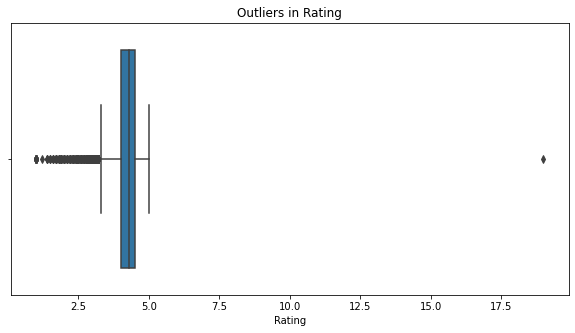

In [11]:
# Box plot for detecting outliers in 'Rating'
plt.figure(figsize=(10, 5))
sns.boxplot(df['Rating'])
plt.title('Outliers in Rating')
plt.show()


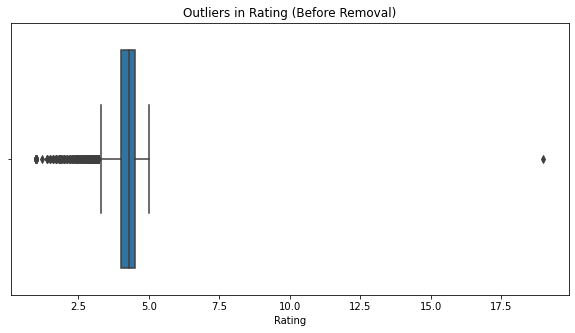

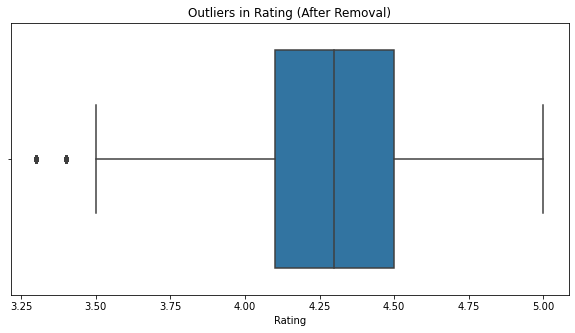

Original DataFrame shape: (10841, 13)
DataFrame shape after removing outliers: (8863, 13)


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate Q1 (25th percentile) and Q3 (75th percentile) for 'Rating'
Q1 = df['Rating'].quantile(0.25)
Q3 = df['Rating'].quantile(0.75)


IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the dataframe to remove outliers
df_no_outliers = df[(df['Rating'] >= lower_bound) & (df['Rating'] <= upper_bound)]

# Boxplot to visualize the outliers before removal
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Rating'])  # Explicitly pass x as a keyword argument
plt.title('Outliers in Rating (Before Removal)')
plt.show()

# Boxplot to visualize the outliers after removal
plt.figure(figsize=(10, 5))
sns.boxplot(x=df_no_outliers['Rating'])  # Explicitly pass x as a keyword argument
plt.title('Outliers in Rating (After Removal)')
plt.show()

# Verify the shape of the original and filtered dataframes
print(f"Original DataFrame shape: {df.shape}")
print(f"DataFrame shape after removing outliers: {df_no_outliers.shape}")


In [13]:
# Check the unique values in the 'Type' column
print(df['Type'].unique())

# Replace 'Free' and 'Paid' as categorical labels
df['Type'] = df['Type'].apply(lambda x: 'Free' if x == 'Free' else 'Paid')

# Check the distribution of the 'Type' column
print(df['Type'].value_counts())


['Free' 'Paid' nan '0']
Free    10039
Paid      802
Name: Type, dtype: int64


Logistic Regression

Accuracy: 93.07%
Confusion Matrix:
[[1957    6]
 [ 140    3]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      1963
           1       0.33      0.02      0.04       143

    accuracy                           0.93      2106
   macro avg       0.63      0.51      0.50      2106
weighted avg       0.89      0.93      0.90      2106



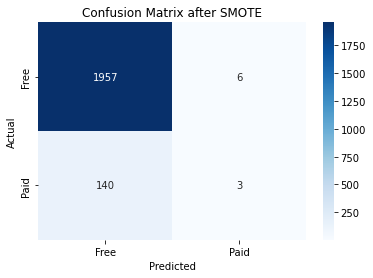

In [17]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Train the Logistic Regression model on the resampled data
log_reg_model = LogisticRegression(max_iter=1000)
log_reg_model.fit(X_resampled, y_resampled)

# Make predictions
y_pred = log_reg_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display the results
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Free', 'Paid'], yticklabels=['Free', 'Paid'])
plt.title('Confusion Matrix after SMOTE')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
